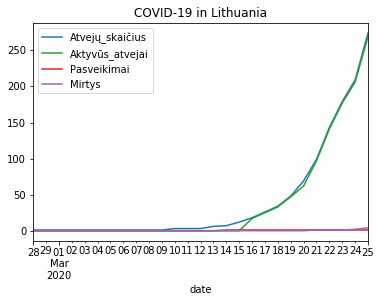

In [235]:
import pandas as pd
import urllib.request, json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
api_url = 'https://services.arcgis.com/XdDVrnFqA9CT3JgB/arcgis/rest/services/covid_statistics/FeatureServer/0/query?f=json&where=1%3D1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=Data%20asc&resultOffset=0&cacheHint=true'

processed_array = []

with urllib.request.urlopen(api_url) as url:    
    try:
        data = json.loads(url.read().decode())
        for x in data['features']:
            processed_array.append(x['attributes'])
 
    except (ValueError, KeyError, TypeError):
        print("JSON format error")

df = pd.DataFrame.from_records(processed_array, 
                               columns=["Data", "Atvejų_skaičius", "Aktyvūs_atvejai", "Pasveikimai", "Mirtys"
                                       ])

df['date'] = pd.to_datetime(df['Data'],unit='ms')
df.set_index('date', inplace=True)

ax = df.plot(y="Atvejų_skaičius", kind="line")
df.plot(y="Aktyvūs_atvejai", kind="line", ax=ax, color="C2")
df.plot(y="Pasveikimai", kind="line", ax=ax, color="C3")
df.plot(y="Mirtys", kind="line", ax=ax, color="C4")

plt.title("COVID-19 in Lithuania")
plt.savefig("plot.png", dpi=200) #image size here
plt.show()